In [28]:
!pip install kmeans-pytorch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from time import time
from kmeans_pytorch import kmeans, kmeans_predict

In [ ]:
# set random seed
np.random.seed(123)

In [ ]:
# dimensions, num clusters
dims, num_clusters = 2, 3

# data sizes
data_sizes = [100000, 1000000, 5000000, 10000000]

In [6]:
gpu_times = []
cpu_times = []

for data_size in data_sizes:
    print(f'\ndata size: {data_size}')

    # data
    x = np.random.randn(data_size, dims) / 6
    x = torch.from_numpy(x)

    # gpu
    start_gpu = time()
    kmeans_gpu = kmeans(X=x, num_clusters=num_clusters, device=torch.device('cuda:0'))
    gpu_time = time() - start_gpu
    gpu_times.append(gpu_time)
    print(f'gpu time: {gpu_time}')
    
    # cpu
    start_cpu = time()
    kmeans_cpu = kmeans(X=x, num_clusters=num_clusters, device=torch.device('cpu'))
    cpu_time = time() - start_cpu
    cpu_times.append(cpu_time)
    print(f'cpu time: {cpu_time}')


data size: 100000
running k-means on cuda:0..


[running kmeans]: 6it [00:00, 19.37it/s, center_shift=0.000058, iteration=6, tol=0.000100]
[running kmeans]: 3it [00:00, 25.17it/s, center_shift=0.001187, iteration=4, tol=0.000100]

gpu time: 9.147990465164185
running k-means on cpu..


[running kmeans]: 7it [00:00, 24.08it/s, center_shift=0.000048, iteration=7, tol=0.000100]
[running kmeans]: 0it [00:00, ?it/s]

cpu time: 0.2962355613708496

data size: 1000000
running k-means on cuda:0..


[running kmeans]: 7it [00:02,  2.70it/s, center_shift=0.000070, iteration=7, tol=0.000100]
[running kmeans]: 0it [00:00, ?it/s]

gpu time: 2.6448638439178467
running k-means on cpu..


[running kmeans]: 6it [00:02,  2.66it/s, center_shift=0.000054, iteration=6, tol=0.000100]


cpu time: 2.287574052810669

data size: 5000000
running k-means on cuda:0..


[running kmeans]: 5it [00:09,  1.82s/it, center_shift=0.000037, iteration=5, tol=0.000100]
[running kmeans]: 0it [00:00, ?it/s]

gpu time: 9.346906185150146
running k-means on cpu..


[running kmeans]: 6it [00:10,  1.79s/it, center_shift=0.000051, iteration=6, tol=0.000100]

cpu time: 10.929628849029541

data size: 10000000
running k-means on cuda:0..



[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 0it [00:03, ?it/s, center_shift=0.108101, iteration=1, tol=0.000100]
[running kmeans]: 1it [00:03,  3.58s/it, center_shift=0.108101, iteration=1, tol=0.000100]
[running kmeans]: 1it [00:07,  3.58s/it, center_shift=0.007211, iteration=2, tol=0.000100]
[running kmeans]: 2it [00:07,  3.58s/it, center_shift=0.007211, iteration=2, tol=0.000100]
[running kmeans]: 2it [00:10,  3.58s/it, center_shift=0.001613, iteration=3, tol=0.000100]
[running kmeans]: 3it [00:10,  3.58s/it, center_shift=0.001613, iteration=3, tol=0.000100]
[running kmeans]: 3it [00:14,  3.58s/it, center_shift=0.000406, iteration=4, tol=0.000100]
[running kmeans]: 4it [00:14,  3.58s/it, center_shift=0.000406, iteration=4, tol=0.000100]
[running kmeans]: 4it [00:17,  3.58s/it, center_shift=0.000130, iteration=5, tol=0.000100]
[running kmeans]: 5it [00:17,  3.57s/it, center_shift=0.000130, iteration=5, tol=0.000100]
[running kmeans]: 5it [00:21,  3.57s/it, center_shift=0.

gpu time: 21.879725694656372
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:03, ?it/s, center_shift=0.170225, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:03,  3.54s/it, center_shift=0.170225, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:07,  3.54s/it, center_shift=0.013261, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:07,  3.57s/it, center_shift=0.013261, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:10,  3.57s/it, center_shift=0.003844, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:10,  3.59s/it, center_shift=0.003844, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:14,  3.59s/it, center_shift=0.001250, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:14,  3.59s/it, center_shift=0.001250, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:18,  3.59s/it, center_shift=0.000416, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:18,  3.60s/it, center_shift=0.000416, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:21,  3.60s/it, cen

cpu time: 25.7757887840271


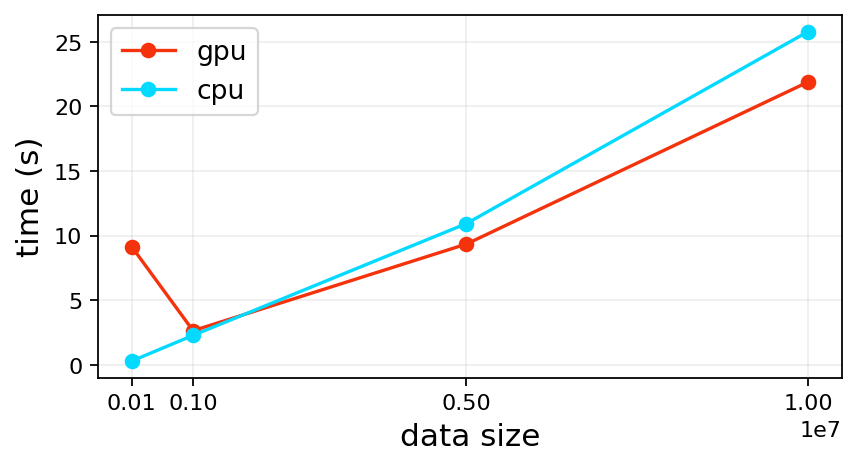

In [29]:
# plot
plt.figure(figsize=(6, 3), dpi=160)
plt.plot(data_sizes, gpu_times, marker='o', label='gpu', color='xkcd:vermillion')
plt.plot(data_sizes, cpu_times, marker='o', label='cpu', color='xkcd:neon blue')
plt.xticks(data_sizes)
plt.legend(fontsize=12)
plt.grid(alpha=0.2)
plt.xlabel('data size', fontsize=14)
plt.ylabel('time (s)', fontsize=14)
plt.show()